<a href="https://colab.research.google.com/github/yevintheenura01/Deep_Learning_Lab2/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [66]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [2 5 3 2 5 3 6 1 1 3]


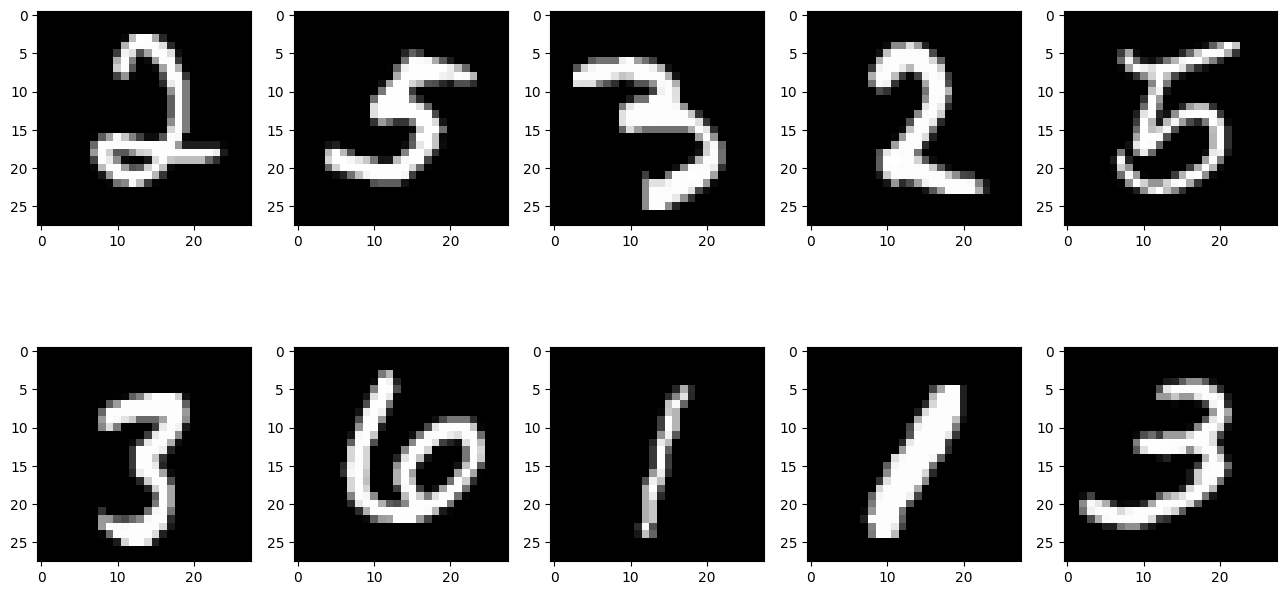

In [67]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [68]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [69]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512, activation='relu',
                input_shape=(784,),
                kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001)))
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001)))
model.add(Dense(10, activation='softmax',
                kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [71]:
train_info = model.fit(new_train_data , new_train_target , epochs = 20, batch_size=64)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8824 - loss: 1.6060
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9518 - loss: 0.4813
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9622 - loss: 0.3853
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9649 - loss: 0.3581
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9681 - loss: 0.3360
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9691 - loss: 0.3309
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9695 - loss: 0.3239
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9713 - loss: 0.3181
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9699 - loss: 0.3139
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9708 - loss: 0.3089
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9729 - loss: 0.3061
Epoch 12/20
938/938 ━━━━━━━━━━

Plot the loss and accuracy graphs

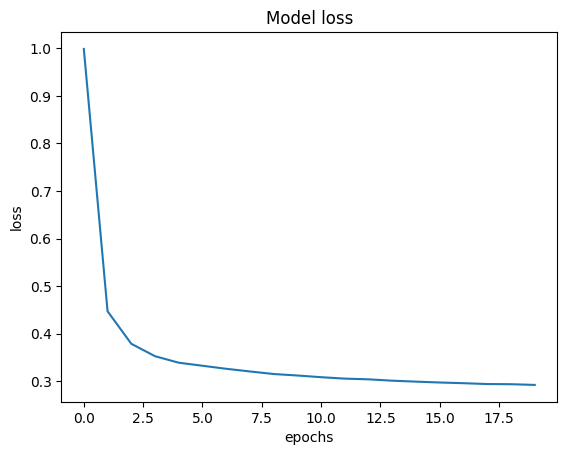

In [72]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

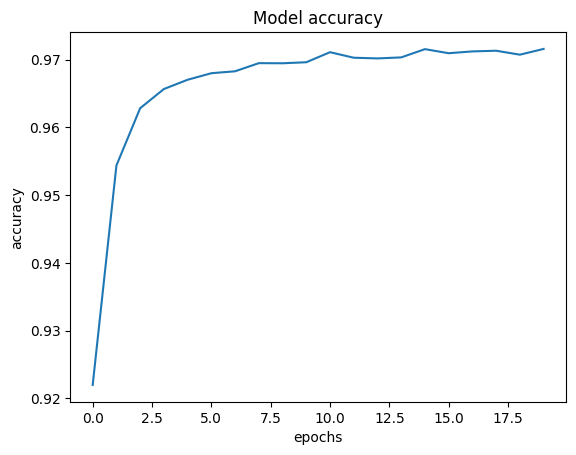

In [73]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [74]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9668 - loss: 0.3098
Loss of the Test dataset is: 0.29002368450164795
Accuracy of the test dataset is: 0.972100019454956


Save the model weights

In [75]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step


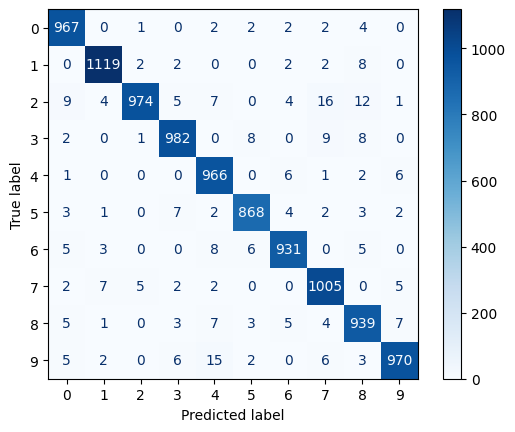

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.show()